In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline

#--- plots accuracy of neural network training
def plot_training_history(accuracies):
    _, ax = plt.subplots()
    ax.set(xlabel='epoch', ylabel='accuracy', title='Training History')
    ax.plot([i for i in range(len(accuracies))], accuracies)
    plt.show()
    
    return

In [2]:
#--- create the datasets of the movie reviews and corresponding sentiments
from movie_review_datasets import MovieReviewDatasets 

mr_datasets = MovieReviewDatasets()

curses is not supported on this machine (please install/reinstall curses for an optimal experience)
Scipy not supported!


In [3]:
#--- create neural network that recognizes the sentiment of a movie review

from movie_review_senti_recog import MovieReviewSentiRecog 

mr_senti_recog_NN = MovieReviewSentiRecog(mr_datasets, layer_sizes=[256, 128, 64, 32])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


Training Step: 16217  | total loss: 0.22024 | time: 3.404s
| SGD | epoch: 102 | loss: 0.22024 - acc: 0.9070 -- iter: 20224/20250
Training Step: 16218  | total loss: 0.21890 | time: 4.427s
| SGD | epoch: 102 | loss: 0.21890 - acc: 0.9101 | val_loss: 0.34315 - val_acc: 0.8747 -- iter: 20250/20250
--


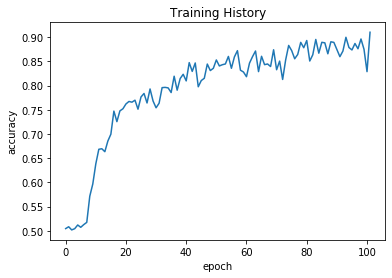


Testing Accuracy: 88.4%


In [4]:
#--- train the neural network, display accuracy 

mr_senti_recog_NN.train(n_epoch=270, exit_acc=0.90)
test_accuracy = mr_senti_recog_NN.test()

plot_training_history (mr_senti_recog_NN.accuracies)
print ("\nTesting Accuracy: {:.1%}".format(test_accuracy))


In [5]:
#--- submit reviews to see of the neural network can recognize the sentiment

reviews = []

#--- add an obviously negative review
review           = "It's amazing anyone could be talented enough to make something this spectacularly awful! " \
                     + "There is nothing good in this film and is bad in all respects!!!"
actual_sentiment = "Negative"
reviews.append ((review, actual_sentiment))

#--- add an obviosuly positive review
review = "I liked this movie alot! It was thoroughly entertaining!" \
        + "There a lot of funny comedic action in this film and it was so exciting!!!"
actual_sentiment = "Positive"
reviews.append ((review, actual_sentiment))

#--- add a review that uses negatives which should fool the neural network
review = "I liked this movie alot! It was thoroughly entertaining!" \
        + "It was not bad. This redeems the bad storyline as the first movie was quite awful!!!" \
        + "Could have been worse but it turned out to be not too shabby!"
actual_sentiment = "Positive"
reviews.append ((review, actual_sentiment))


#--- go through reviews and see if the neural network can recognize the sentiments
for review, actual_sentiment in reviews:

    recognized_sentiment = mr_senti_recog_NN.sentiment(review.lower())

    print ("\nReview: '{}'".format(review))
    print ("\nThe neural network believes the review appears to have a ***{}*** sentiment.".format(recognized_sentiment.upper()))
    
    if recognized_sentiment == actual_sentiment:
        print ("The neural network CORRECTLY RECOGNIZED the sentiment of the review!")
    else:
        print ("The neural network DID NOT correctly recognized the sentiment of the review.")
    print("---")



Review: 'It's amazing anyone could be talented enough to make something this spectacularly awful! There is nothing good in this film and is bad in all respects!!!'

The neural network believes the review appears to have a ***NEGATIVE*** sentiment.
The neural network CORRECTLY RECOGNIZED the sentiment of the review!
---

Review: 'I liked this movie alot! It was thoroughly entertaining!There a lot of funny comedic action in this film and it was so exciting!!!'

The neural network believes the review appears to have a ***POSITIVE*** sentiment.
The neural network CORRECTLY RECOGNIZED the sentiment of the review!
---

Review: 'I liked this movie alot! It was thoroughly entertaining!It was not bad. This redeems the bad storyline as the first movie was quite awful!!!Could have been worse but it turned out to be not too shabby!'

The neural network believes the review appears to have a ***NEGATIVE*** sentiment.
The neural network DID NOT correctly recognized the sentiment of the review.
---
